![](itd2.png)
 
    
**Inteligencia Artificial:**
**Arboles de Decision Dataset Covid19 UNIDAD 5 PROYECTO**

**Nombre del docente:**
**Jose Gabriel Rodriguez Rivas**

**Nombre del alumno:**
**Vergara Hernandez Jesus Alejandro**

**Parte 1.- Importacion de datos**

**--------**

In [1]:
#Code cell 1
#import pandas
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams.update({'font.size': 17, 'lines.linewidth':4})
import pandas as pd
data=pd.read_csv("C:/Users/esemi/Unidad 3 IT/Practica de Laboratorio 2 UNIDAD 3/Covid19.csv",encoding='latin1')

print(data.head())

  FECHA_ACTUALIZACION ID_REGISTRO  ORIGEN  SECTOR  ENTIDAD_UM  SEXO  \
0          2020-08-09      11c49c       2       3           2     1   
1          2020-08-09      144935       2       3           2     2   
2          2020-08-09      1bf200       2       4           9     1   
3          2020-08-09      010133       2       4          26     1   
4          2020-08-09      1a1635       2       3          15     2   

   ENTIDAD_NAC  ENTIDAD_RES  MUNICIPIO_RES  TIPO_PACIENTE  ... CARDIOVASCULAR  \
0            2            2              2              1  ...              2   
1           26            2              2              1  ...              2   
2            9            9             15              2  ...              2   
3           26           26             55              1  ...              2   
4           15           15             33              2  ...              2   

  OBESIDAD RENAL_CRONICA  TABAQUISMO  OTRO_CASO  RESULTADO  MIGRANTE  \
0        2    

In [2]:
data.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-08-09,11c49c,2,3,2,1,2,2,2,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
1,2020-08-09,144935,2,3,2,2,26,2,2,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,2020-08-09,1bf200,2,4,9,1,9,9,15,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
3,2020-08-09,010133,2,4,26,1,26,26,55,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
4,2020-08-09,1a1635,2,3,15,2,15,15,33,2,...,2,1,2,2,1,1,99,MÃ©xico,99,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091695 entries, 0 to 1091694
Data columns (total 35 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   FECHA_ACTUALIZACION  1091695 non-null  object
 1   ID_REGISTRO          1091695 non-null  object
 2   ORIGEN               1091695 non-null  int64 
 3   SECTOR               1091695 non-null  int64 
 4   ENTIDAD_UM           1091695 non-null  int64 
 5   SEXO                 1091695 non-null  int64 
 6   ENTIDAD_NAC          1091695 non-null  int64 
 7   ENTIDAD_RES          1091695 non-null  int64 
 8   MUNICIPIO_RES        1091695 non-null  int64 
 9   TIPO_PACIENTE        1091695 non-null  int64 
 10  FECHA_INGRESO        1091695 non-null  object
 11  FECHA_SINTOMAS       1091695 non-null  object
 12  FECHA_DEF            1091695 non-null  object
 13  INTUBADO             1091695 non-null  int64 
 14  NEUMONIA             1091695 non-null  int64 
 15  EDAD           

**Preparacion de los datos:**
*En esta parte del codigo vamos a mostrar el total de personas que estan el registro del archivo Covid19 del cual por el
momento muestra 67165 personas muertas*

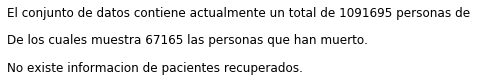

In [4]:
fig, ax = plt.subplots(figsize=(4,1))
ax.text(0.0, 1.0, 'El conjunto de datos contiene actualmente un total de {} personas de'.format(len(data)), dict(size=12))
ax.text(0.0, 0.5, 'De los cuales muestra {} las personas que han muerto.'.format(len(data.loc[(data['FECHA_DEF'] != '9999-99-99') & (data.FECHA_DEF.notnull())])), dict(size=12))
ax.text(0.0, 0.0, 'No existe informacion de pacientes recuperados.'.format(len(data.loc[(data['FECHA_DEF'] != '9999-99-99') & (data.FECHA_DEF.notnull())])), dict(size=12))
ax.axis('off')
plt.show()

**A continuacion se va mostrar una grafica de pastel donde se muestra el numero de casos confirmados por Covid tomando en 
cuenta a los que estan intubados y UCI**

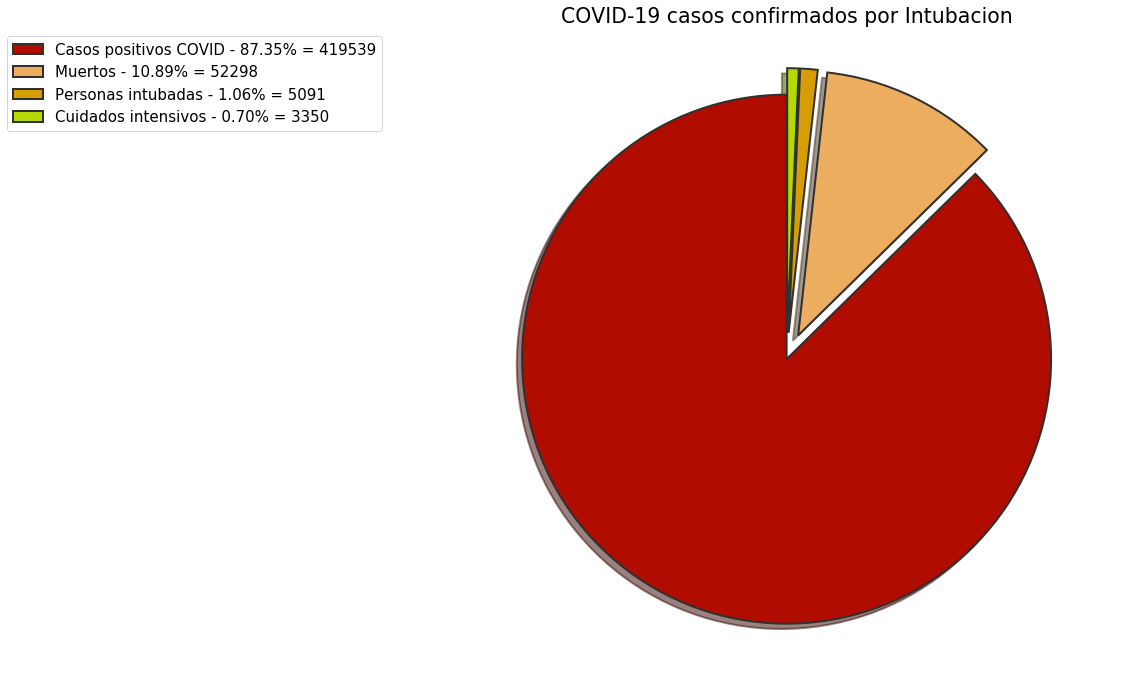

In [66]:
casos_positivos = data.loc[data['RESULTADO'] == 1]
fallecimientos = data.loc[(data['RESULTADO'] == 1) & (data['FECHA_DEF'] != '9999-99-99') & (data.FECHA_DEF.notnull())]
intubados = data.loc[(data['RESULTADO'] == 1) & ((data['FECHA_DEF'] == '9999-99-99') | (data.FECHA_DEF.isnull())) & (data['INTUBADO'] == 1)]
cuidados_intensivos = data.loc[(data['RESULTADO'] == 1) & ((data['FECHA_DEF'] == '9999-99-99') | (data.FECHA_DEF.isnull())) & (data['UCI'] == 1)]

cpcounts = len(casos_positivos)
dpcounts = len(fallecimientos)
aicounts = len(intubados)
iccounts = len(cuidados_intensivos)

colors = ['#b00c00', '#edad5f', '#d69e04', '#b5d902', '#63ba00', '#05b08e', '#128ba6', '#5f0da6', '#b30bb0', '#c41484', '#a1183d', '#3859eb', '#4da1bf', '#6bcfb6']

sizes = np.array([cpcounts-dpcounts-aicounts-iccounts, dpcounts, iccounts,aicounts])
# Plot
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title('COVID-19 casos confirmados por Intubacion')
patches, texts = ax1.pie(sizes,colors=colors, startangle=90, shadow=True, explode=(0.0,0.1,0.1,0.1),
                         wedgeprops={'linewidth': 2,"edgecolor":"#303030", 'linestyle': 'solid', 'antialiased': True})

porcent = 100.*sizes/sizes.sum()
tags = ['Casos positivos COVID', 'Muertos', 'Personas intubadas', 'Cuidados intensivos']
labels = ['{0} - {1:0.2f}% = {2:0.0f}'.format(tags[x],porcent[x],sizes[x]) for x in range(len(tags))]

ax1.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=15)
fig.tight_layout()

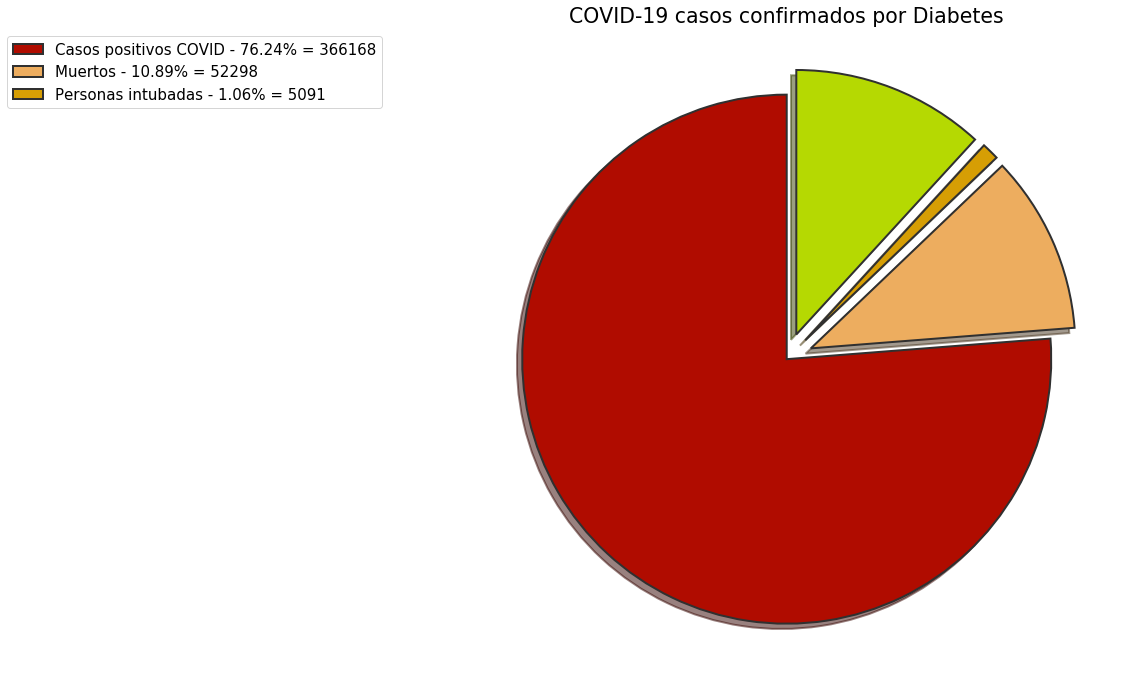

In [67]:
casos_positivos = data.loc[data['RESULTADO'] == 1]
fallecimientos = data.loc[(data['RESULTADO'] == 1) & (data['FECHA_DEF'] != '9999-99-99') & (data.FECHA_DEF.notnull())]
diabetes = data.loc[(data['RESULTADO'] == 1) & ((data['FECHA_DEF'] == '9999-99-99') | (data.FECHA_DEF.isnull())) & (data['DIABETES'] == 1)]

cpcounts = len(casos_positivos)
dpcounts = len(fallecimientos)
aicounts = len(diabetes)


colors = ['#b00c00', '#edad5f', '#d69e04', '#b5d902', '#63ba00', '#05b08e', '#128ba6', '#5f0da6', '#b30bb0', '#c41484', '#a1183d', '#3859eb', '#4da1bf', '#6bcfb6']

sizes = np.array([cpcounts-dpcounts-aicounts-iccounts, dpcounts, iccounts,aicounts])
# Plot
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title('COVID-19 casos confirmados por Diabetes')
patches, texts = ax1.pie(sizes,colors=colors, startangle=90, shadow=True, explode=(0.0,0.1,0.1,0.1),
                         wedgeprops={'linewidth': 2,"edgecolor":"#303030", 'linestyle': 'solid', 'antialiased': True})

porcent2 = 100.*sizes/sizes.sum()
tags = ['Casos positivos COVID', 'Muertos', 'Personas intubadas']
labels = ['{0} - {1:0.2f}% = {2:0.0f}'.format(tags[x],porcent2[x],sizes[x]) for x in range(len(tags))]

ax1.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=15)
fig.tight_layout()

In [76]:
porcent2

array([76.24084384, 10.88911006,  1.06001108, 11.81003502])

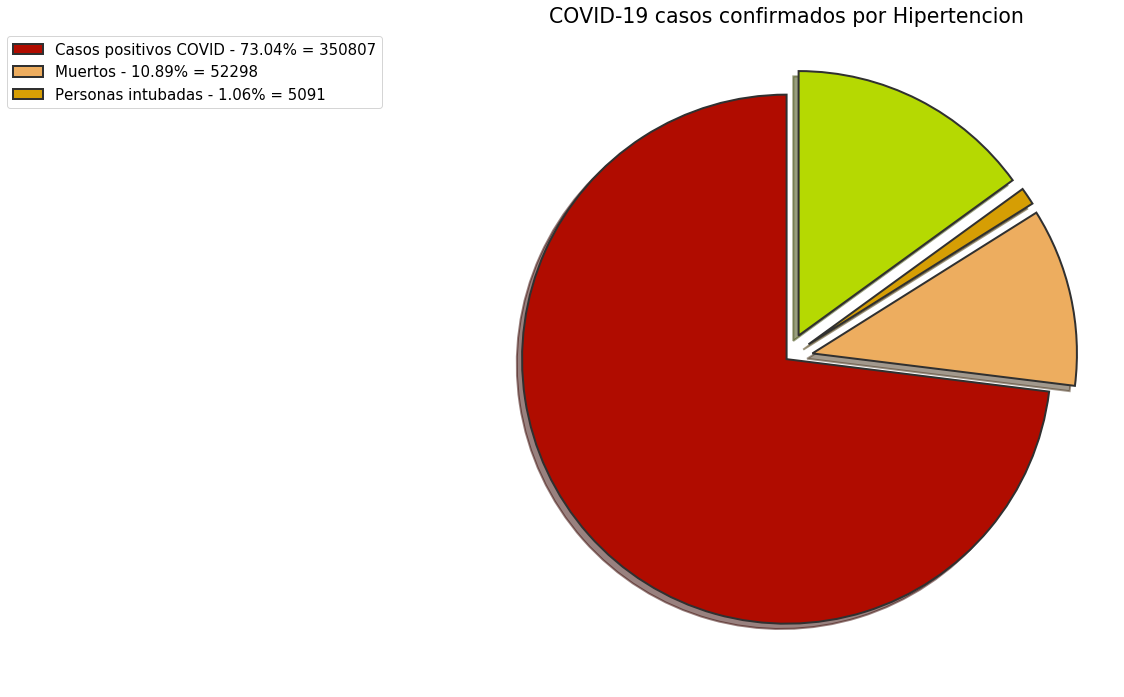

In [68]:
casos_positivos = data.loc[data['RESULTADO'] == 1]
fallecimientos = data.loc[(data['RESULTADO'] == 1) & (data['FECHA_DEF'] != '9999-99-99') & (data.FECHA_DEF.notnull())]
hipertencion = data.loc[(data['RESULTADO'] == 1) & ((data['FECHA_DEF'] == '9999-99-99') | (data.FECHA_DEF.isnull())) & (data['HIPERTENSION'] == 1)]

cpcounts = len(casos_positivos)
dpcounts = len(fallecimientos)
aicounts = len(hipertencion)


colors = ['#b00c00', '#edad5f', '#d69e04', '#b5d902', '#63ba00', '#05b08e', '#128ba6', '#5f0da6', '#b30bb0', '#c41484', '#a1183d', '#3859eb', '#4da1bf', '#6bcfb6']

sizes = np.array([cpcounts-dpcounts-aicounts-iccounts, dpcounts, iccounts,aicounts])
# Plot
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title('COVID-19 casos confirmados por Hipertencion')
patches, texts = ax1.pie(sizes,colors=colors, startangle=90, shadow=True, explode=(0.0,0.1,0.1,0.1),
                         wedgeprops={'linewidth': 2,"edgecolor":"#303030", 'linestyle': 'solid', 'antialiased': True})

porcent3 = 100.*sizes/sizes.sum()
tags = ['Casos positivos COVID', 'Muertos', 'Personas intubadas']
labels = ['{0} - {1:0.2f}% = {2:0.0f}'.format(tags[x],porcent3[x],sizes[x]) for x in range(len(tags))]

ax1.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=15)
fig.tight_layout()

**Como se puede mostrar en las graficas de pastel muestra una tasa de mortalidad del 11.30% y un 1.90% de casos confirmados de covid**

**En esta parte del codigo se ara un analisis de correlacion con el RESULTADO Y LA FECHA_DEF para ver casos positivos, negativos
y casos pendientes de covid19**

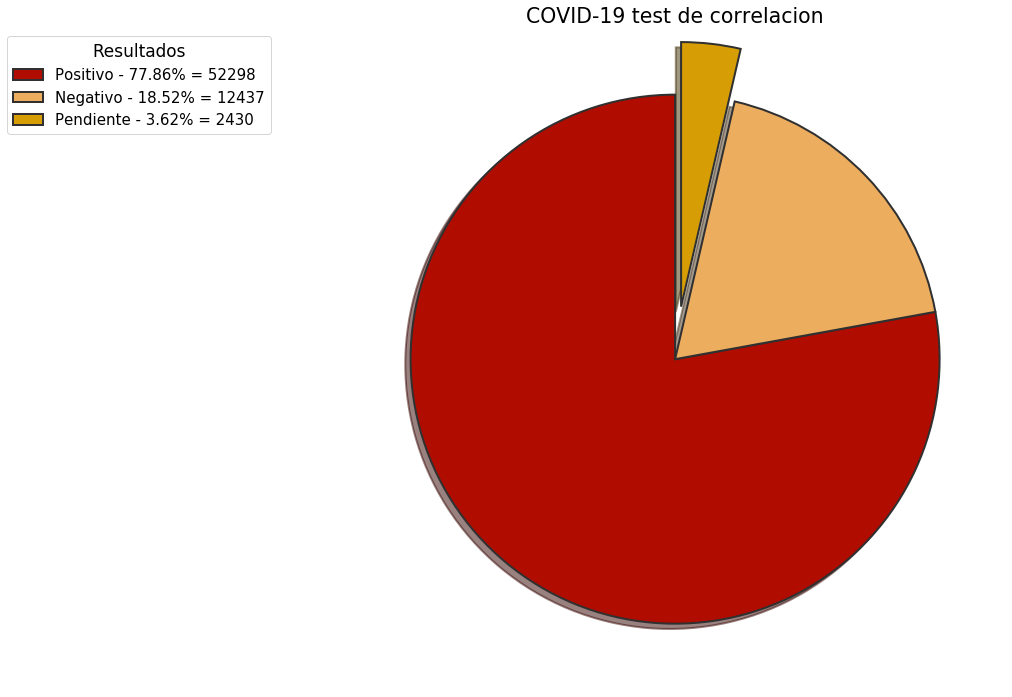

In [69]:
casos_negativos = data.loc[(data['RESULTADO'] == 2) & (data['FECHA_DEF'] != '9999-99-99') & (data.FECHA_DEF.notnull())]
casos_pendientes = data.loc[(data['RESULTADO'] == 3) & (data['FECHA_DEF'] != '9999-99-99') & (data.FECHA_DEF.notnull())]

dpcounts
dncounts = len(casos_negativos)
dpecounts = len(casos_pendientes)

sizes = np.array([dpcounts,dncounts,dpecounts])
# Plot
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title('COVID-19 test de correlacion')
patches, texts = ax1.pie(sizes,colors=colors, startangle=90, shadow=True, explode=(0,0,0.2),
                         wedgeprops={'linewidth': 2,"edgecolor":"#303030", 'linestyle': 'solid', 'antialiased': True})

labels = ['{0} - {1:.2f}% = {2}'.format(i,100*j/sum(sizes),j) for i,j in zip(list(['Positivo', 'Negativo', 'Pendiente']), sizes)]
sort_legend = False
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, sizes),
                                          key=lambda x: x[2],
                                          reverse=True))


ax1.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=15, title="Resultados")
fig.tight_layout()

**Ahora vamos hacer otra correlacion pero haora con los datos anteriores que fueron con las graficas de Entubado, Diabetes e
Hipertencion para asociar numero de muertos con respecto al tipo de enfermedad**

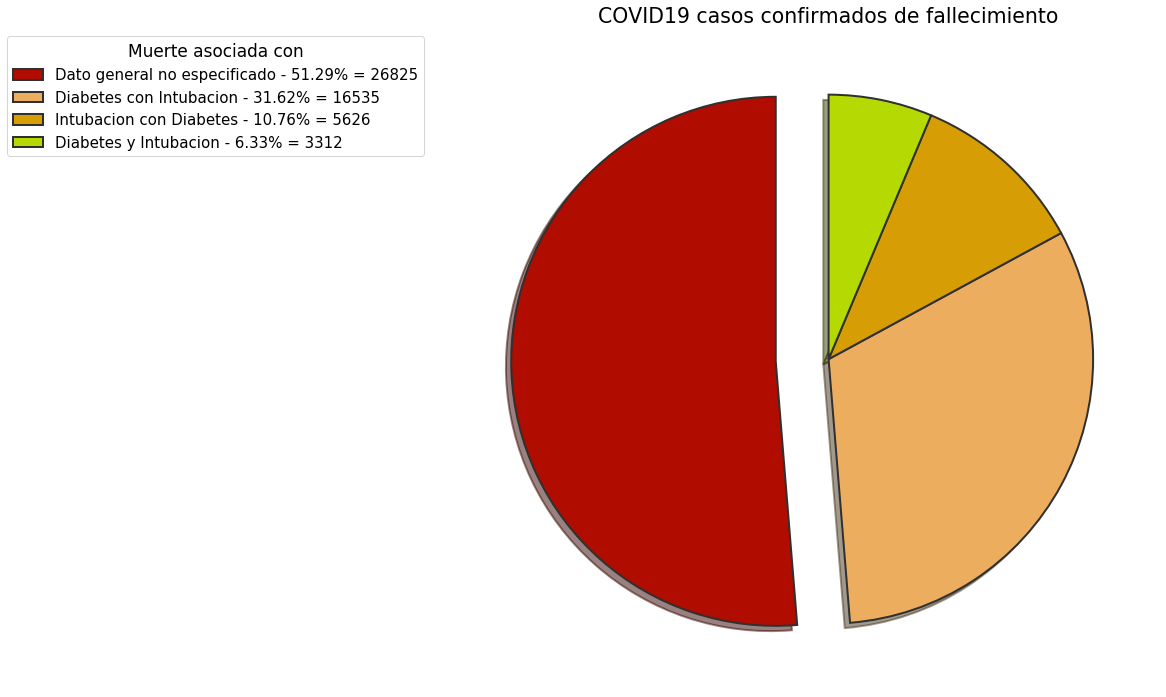

In [70]:
from collections import OrderedDict
dato_no_especificado = len(data.loc[(data['RESULTADO'] == 1) & (data['DIABETES'] != 1) & (data['INTUBADO'] != 1) & (data['FECHA_DEF'] != '9999-99-99') & (data.FECHA_DEF.notnull())])
diabete_y_intubacion = len(data.loc[(data['RESULTADO'] == 1) & (data['INTUBADO'] == 1) & (data['DIABETES'] == 1) & (data['FECHA_DEF'] != '9999-99-99') & (data.FECHA_DEF.notnull())])
intubacion_con_diabetes = len(data.loc[(data['RESULTADO'] == 1) & (data['INTUBADO'] == 1) & (data['DIABETES'] != 1) & (data['FECHA_DEF'] != '9999-99-99') & (data.FECHA_DEF.notnull())])
diabetes_con_intubacion = len(data.loc[(data['RESULTADO'] == 1) & (data['DIABETES'] == 1) & (data['INTUBADO'] != 1) & (data['FECHA_DEF'] != '9999-99-99') & (data.FECHA_DEF.notnull())])
d = {'Dato general no especificado':dato_no_especificado,
        'Diabetes y Intubacion':diabete_y_intubacion,
        'Intubacion con Diabetes':intubacion_con_diabetes,
        'Diabetes con Intubacion':diabetes_con_intubacion
       }
d = OrderedDict(sorted(d.items(), key=lambda kv: kv[1], reverse=True))
tags = list(d.keys())
sizes = np.array(list(d.values()))
# Plot
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title('COVID19 casos confirmados de fallecimiento')
patches, texts = ax1.pie(sizes,colors=colors, startangle=90, shadow=True, explode=(0.2,0,0,0.0),
                         wedgeprops={'linewidth': 2,"edgecolor":"#303030", 'linestyle': 'solid', 'antialiased': True})

labels = ['{0} - {1:.2f}% = {2}'.format(i,100*j/sum(sizes),j) for i,j in zip(list(tags), sizes)]
sort_legend = False
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, sizes),
                                          key=lambda x: x[2],
                                          reverse=True))


ax1.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=15, title="Muerte asociada con")
fig.tight_layout()

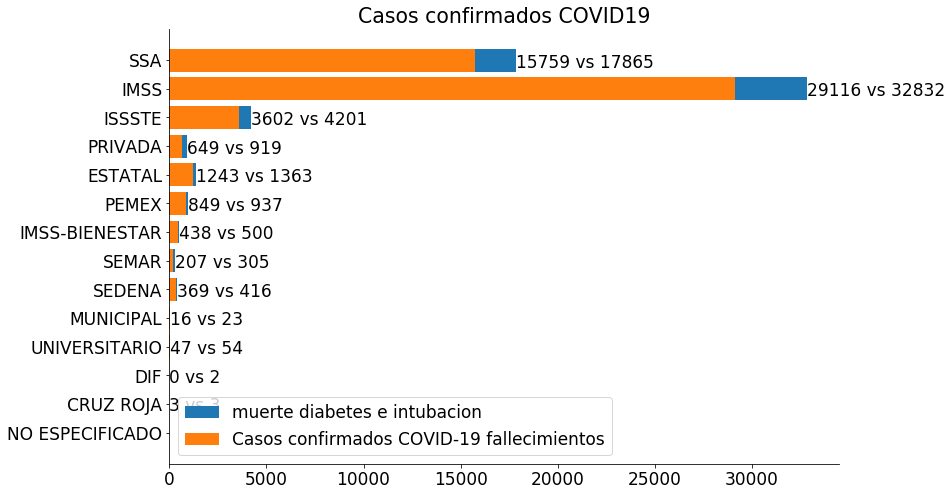

In [78]:
path_sectors = 'SECTOR.csv'
df_sector = pd.read_csv(path_sectors)
df_sector['TOTAL_M'] = [len(data.loc[(data['SECTOR'] == x) & (data['FECHA_DEF'] != '9999-99-99') & (data.FECHA_DEF.notnull())]) for x in list(df_sector['CLAVE'])]
df_sector['TOTAL_MP'] = [len(data.loc[(data['SECTOR'] == x) & (data['FECHA_DEF'] != '9999-99-99') & (data.FECHA_DEF.notnull()) & (data['RESULTADO'] == 1)]) for x in list(df_sector['CLAVE'])]
df_sector['TOTAL_P'] = [len(data.loc[(data['SECTOR'] == x) & (data['RESULTADO'] == 1)]) for x in list(df_sector['CLAVE'])]
df_sector['TOTAL_MP_PN'] = [len(data.loc[(data['SECTOR'] == x) & (data['FECHA_DEF'] != '9999-99-99') & (data.FECHA_DEF.notnull()) & ((data['RESULTADO'] == 1) | (data['DIABETES'] == 1) | (data['INTUBADO'] == 1))]) for x in list(df_sector['CLAVE'])]
df_sector['PP_PM_PN'] = (100*df_sector['TOTAL_MP_PN'])/df_sector['TOTAL_P']
df_sector['PP_TM'] = (100*df_sector['TOTAL_M'])/df_sector['TOTAL_P']
df_sector['PP_PM'] = (100*df_sector['TOTAL_MP'])/df_sector['TOTAL_P']
df_sector = df_sector.sort_values('TOTAL_P', ascending=False)
df_sector = df_sector.fillna(0)
df_sector = df_sector.sort_values('TOTAL_P', ascending=True)
df_sector = df_sector.fillna(0)

fig, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title('Casos confirmados COVID19')
ax1.barh(df_sector['DESCRIPCIÓN'], df_sector['TOTAL_MP_PN']* (100)/(100), align='center', label="muerte diabetes e intubacion")
ax1.barh(df_sector['DESCRIPCIÓN'], df_sector['TOTAL_MP'], align='center', label="Casos confirmados COVID-19 fallecimientos")
for i, v in enumerate(df_sector['TOTAL_MP_PN']*(100)/(100)):
    positive = list(df_sector['TOTAL_MP'])[i]
    suposed = v
    if positive > 0 or suposed > 0:
        ax1.text(v + 3, i - 0.25, '{0} vs {1:0.0f}'.format(positive, suposed))

ax1.legend()
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')

**Podemos observar en la grafica de pastel la cantidad de personas por intubacion e impertencion que la tasa de muerte es mayor
que las demas ya que presenta un total de 19279 muertes por hipertencion que ademas se encunetrarn entubadas**

**AHORA VAMOS A DAR CONTINUIDAD A LO QUE NOSOTROS COMO EQUIPO VAMOS A ANALISAR Y ES LA CUESTION DE VER EN DIFERENTES SECTORES
LOS CASOS CONFIRMADOS DE COVID Y LOS CASOS DE FALLECIMIENTO POR COVIV EN LO QUE ES MEXICO YA DANDO UN EFOQUE EN UNA SOLA CIUDAD CON LOS DATOS QUE SE UTILIZARON ANTERIORMENTE**

**Como primera instancia se muestra los casos de contagios que se han presentado**

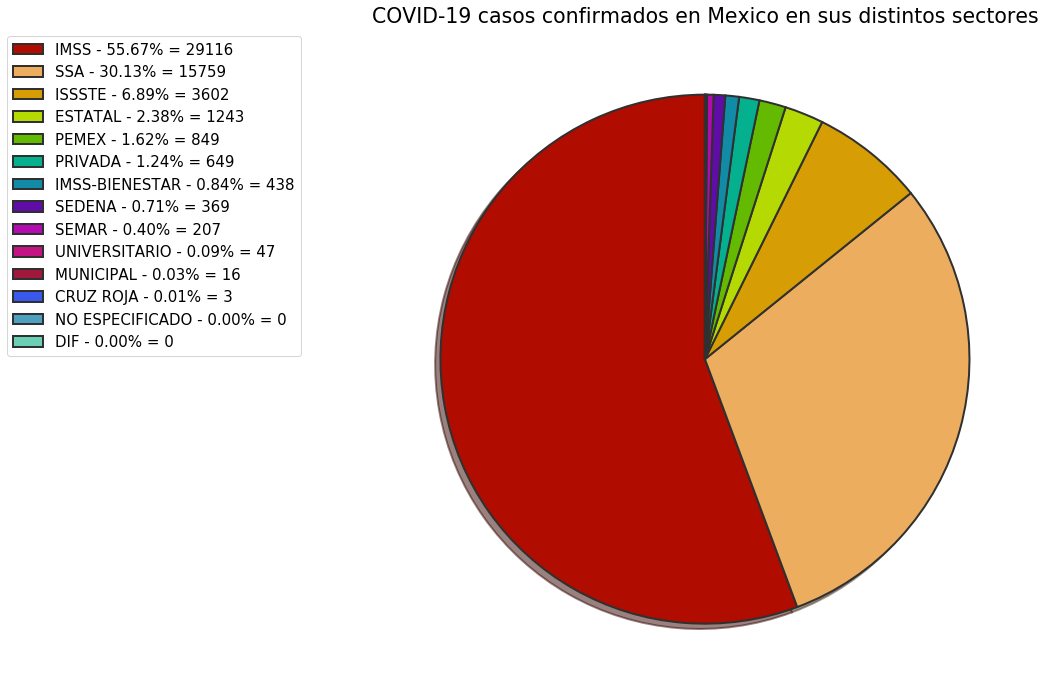

In [95]:
colors = ['#b00c00', '#edad5f', '#d69e04', '#b5d902', '#63ba00', '#05b08e', '#128ba6', '#5f0da6', '#b30bb0', '#c41484', '#a1183d', '#3859eb', '#4da1bf', '#6bcfb6']
df_sector['TOTAL'] = [len(data.loc[(data['SECTOR'] == x) & (data['FECHA_DEF'] != '9999-99-99') & (data.FECHA_DEF.notnull()) & (data['RESULTADO'] == 1)]) for x in list(df_sector['CLAVE'])]
df_sector = df_sector.sort_values('TOTAL', ascending=False)

sizes = list(df_sector['TOTAL'])

# Plot
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title('COVID-19 casos confirmados en Mexico en sus distintos sectores')
patches, texts = ax1.pie(sizes,colors=colors, startangle=90, shadow=True,
                         wedgeprops={'linewidth': 2,"edgecolor":"#303030", 'linestyle': 'solid', 'antialiased': True})

labels = ['{0} - {1:.2f}% = {2}'.format(i,100*j/sum(sizes),j) for i,j in zip(list(df_sector['DESCRIPCIÓN']), sizes)]
sort_legend = False
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, sizes),
                                          key=lambda x: x[2],
                                          reverse=True))


ax1.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=15)
fig.tight_layout()

**En seguida se mostrara la grafica de fallecimiento en Mexico en los diferentes sectores**

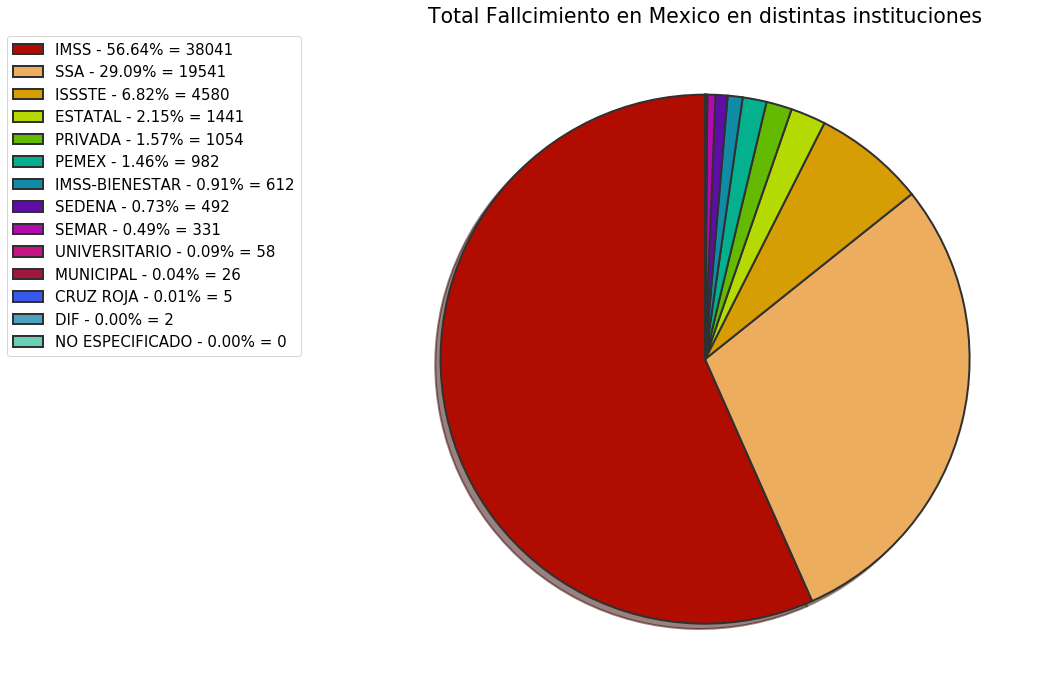

In [98]:
df_sector['TOTAL'] = [len(data.loc[(data['SECTOR'] == x) & (data['FECHA_DEF'] != '9999-99-99') & (data.FECHA_DEF.notnull())]) for x in list(df_sector['CLAVE'])]
df_sector = df_sector.sort_values('TOTAL', ascending=False)

sizes = list(df_sector['TOTAL'])

# Plot
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title('Total Fallcimiento en Mexico en distintas instituciones')
patches, texts = ax1.pie(sizes,colors=colors, startangle=90, shadow=True,
                         wedgeprops={'linewidth': 2,"edgecolor":"#303030", 'linestyle': 'solid', 'antialiased': True})

labels = ['{0} - {1:.2f}% = {2}'.format(i,100*j/sum(sizes),j) for i,j in zip(list(df_sector['DESCRIPCIÓN']), sizes)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, sizes),
                                          key=lambda x: x[2],
                                          reverse=True))


ax1.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=15)
fig.tight_layout()

**Y como se puede observar la tasa de fallecimineto de los diferentes sectores Haora para finalizar se compara la tasa de 
mortalidad de estas instituciones**

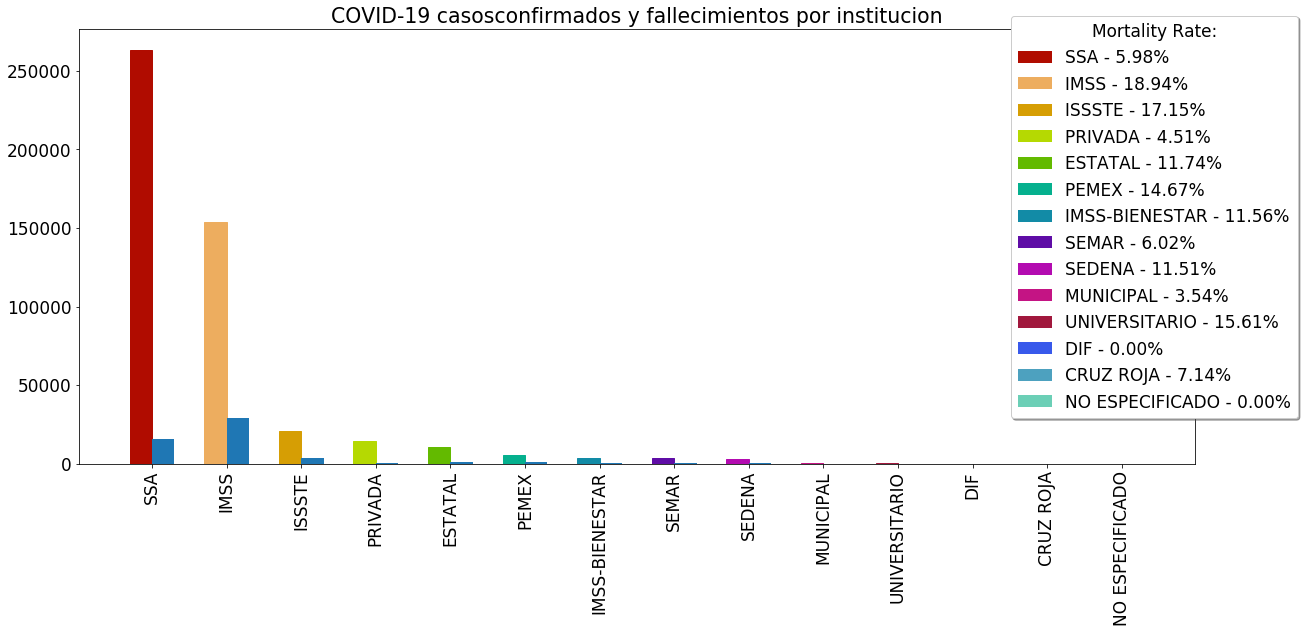

In [99]:
df_sector['TOTAL_M'] = [len(data.loc[(data['SECTOR'] == x) & (data['FECHA_DEF'] != '9999-99-99') & (data.FECHA_DEF.notnull())]) for x in list(df_sector['CLAVE'])]
df_sector['TOTAL_MP'] = [len(data.loc[(data['SECTOR'] == x) & (data['FECHA_DEF'] != '9999-99-99') & (data.FECHA_DEF.notnull()) & (data['RESULTADO'] == 1)]) for x in list(df_sector['CLAVE'])]
df_sector['TOTAL_P'] = [len(data.loc[(data['SECTOR'] == x) & (data['RESULTADO'] == 1)]) for x in list(df_sector['CLAVE'])]
df_sector = df_sector.sort_values('TOTAL_P', ascending=False)
df_sector = df_sector.fillna(0)
fig, ax1 = plt.subplots(figsize=(20,8))
ax1.set_title('COVID-19 casosconfirmados y fallecimientos por institucion')
x = np.arange(len(df_sector['DESCRIPCIÓN']))
w=0.3
total_p = ax1.bar(x, df_sector['TOTAL_P'], width=w, color='#edad5f', align='center')
for i, bar in enumerate(total_p):
    bar.set_color(colors[i])
total_mp = ax1.bar(x + w, df_sector['TOTAL_MP'], width=w, align='center')
legend1 = ax1.legend([total_mp],['Deceased'])
ax1.legend(handles=[matplotlib.patches.Patch(facecolor=colors[x], label='{0} - {1:0.2f}%'.format(list(df_sector['DESCRIPCIÓN'])[x],list(df_sector['PP_PM'])[x])) for x in range(len(df_sector['DESCRIPCIÓN']))], 
                     loc='best',bbox_to_anchor=(1.1, 1.05), fancybox=True, shadow=True, title="Mortality Rate:")
plt.xticks(x + w /2, df_sector['DESCRIPCIÓN'], rotation='vertical')
plt.gca().add_artist(legend1)
plt.show()

**-------------------------------------------**

**Ahora como plus en esta practica agregaremos lo que se realizo en la materia inteligencia artificial arboles de desicion que fue calcular los que sobrevivieron y los que fallecieron**

In [100]:
data['Superviviente'] = data['FECHA_DEF'].apply(lambda fecha: 1 if fecha=='9999-99-99' else 0)

**En el siguiente codigo vamos a observar ya datos numericos en "FECHA_DEF"**

In [101]:
data.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Superviviente
0,2020-08-09,11c49c,2,3,2,1,2,2,2,1,...,2,2,2,1,1,99,MÃ©xico,99,97,1
1,2020-08-09,144935,2,3,2,2,26,2,2,1,...,2,2,2,1,1,99,MÃ©xico,99,97,1
2,2020-08-09,1bf200,2,4,9,1,9,9,15,2,...,2,2,2,99,1,99,MÃ©xico,99,2,1
3,2020-08-09,010133,2,4,26,1,26,26,55,1,...,2,2,2,99,1,99,MÃ©xico,99,97,1
4,2020-08-09,1a1635,2,3,15,2,15,15,33,2,...,1,2,2,1,1,99,MÃ©xico,99,2,0


**Paso 3: Aplicacion de arbol de decisiones**

In [102]:
y_target = data["Superviviente"].values

In [103]:
columns = ["INTUBADO","NEUMONIA", "UCI", "TIPO_PACIENTE","EDAD","SEXO"]
X_input = data[list(columns)].values

In [104]:
from sklearn import tree
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf_train = clf_train.fit(X_input, y_target)

**Evaluacion del Modelo**

In [105]:
clf_train.score(X_input,y_target)

0.9438387095296763

**Paso 4: Visualizar el árbol con datos de si sobrevivio o no sobrevivio**

In [106]:
clasificacion = ['Estado vivo','Estado no vivo']

In [107]:
from sklearn.externals.six import StringIO
with open("covid.dot", 'w') as f:
    f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns,
                          class_names=clasificacion)

C:\Users\esemi\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


**Creacion de la imagen**

In [108]:
!dot -Tpng covid.dot -o covid.png

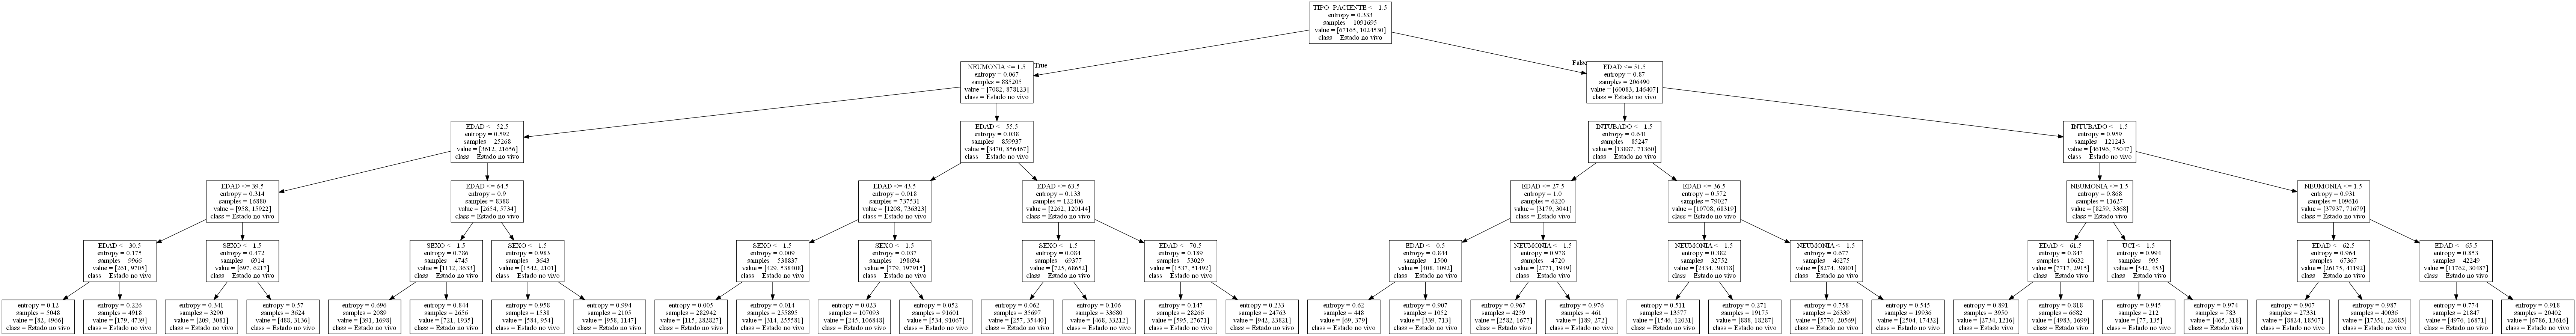

In [109]:
from IPython.display import Image

#display the decison tree graphic
Image("covid.png")

**Arbol de decision con diseño y color**

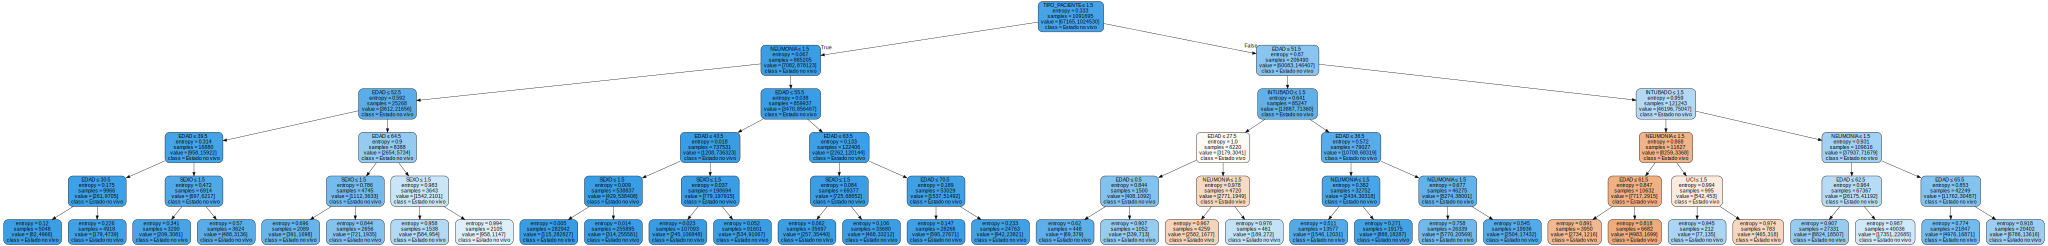

In [110]:

import graphviz
dot_data = tree.export_graphviz(
    clf_train,
    out_file = None,
    class_names = clasificacion,
    
    feature_names = columns,
    filled= True,
    rounded= True,
    special_characters = True
)
graph = graphviz.Source(dot_data)
graph.render('CovidColor1',format='png')
graph

**CONCLUSIONES**